   #                       Oral Insulin Phase II Clinical Trial Data

##  Phase II clinical trial data that compares the efficacy and safety of a new oral insulin to treat diabetes to injectable insulin

The Auralin Phase II clinical trial dataset comes in three tables: `patients`, `treatments`, and `adverse_reactions`. Acquaint yourself with them through visual assessment below.

### Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

In [3]:
# Display the patients table
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


`patients` columns:
- **patient_id**: the unique identifier for each patient in the [Master Patient Index](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (i.e. patient database) of the pharmaceutical company that is producing Auralin
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **given_name**: the given name (i.e. first name) of each patient
- **surname**: the surname (i.e. last name) of each patient
- **address**: the main address for each patient
- **city**: the corresponding city for the main address of each patient
- **state**: the corresponding state for the main address of each patient
- **zip_code**: the corresponding zip code for the main address of each patient
- **country**: the corresponding country for the main address of each patient (all United states for this clinical trial)
- **contact**: phone number and email information for each patient
- **birthdate**: the date of birth of each patient (month/day/year). The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is  age >= 18 *(there is no maximum age because diabetes is a [growing problem](http://www.diabetes.co.uk/diabetes-and-the-elderly.html) among the elderly population)*
- **weight**: the weight of each patient in pounds (lbs)
- **height**: the height of each patient in inches (in)
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. *The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is 16 >= BMI >= 38.*

In [4]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


`treatments` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the [international unit](https://en.wikipedia.org/wiki/International_unit) of measurement and the standard measurement for insulin.
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The [HbA1c test](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

In [5]:
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


`adverse_reactions` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **adverse_reaction**: the adverse reaction reported by the patient


In [6]:
patients.loc[patients['height'] == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [8]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [9]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [10]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [11]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [12]:
adverse_reactions.adverse_reaction.value_counts()

hypoglycemia                 19
injection site discomfort     6
headache                      3
nausea                        2
throat irritation             2
cough                         2
Name: adverse_reaction, dtype: int64

In [13]:
len(patients.loc[patients['city'] == 'New York'])

18

In [14]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [15]:
patients.weight.sort_values()[0:5]

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
Name: weight, dtype: float64

In [16]:
patients.loc[patients['weight'] == 48.8]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [17]:
sum(treatments.auralin.isnull())

0

In [18]:
sum(treatments.novodra.isnull())

0

### Assessing & Quality Data

**Patients table**

    -zip code is a float not a string and has four digits sometimes

    -Tim height is 27in instead of 72in

    -full state names sometimes obbrevations other times

    -Dsvid Gustatsson incorrect name spell (David)
    
    -missing demograohic data (address, contact) columns
    
    -Error on datatypes (sex-state-zip code-birthday)
    
    -Multiple phone number formats
    
    -Duplicate John Doe data
    
    -Multiple records for Jakobsen, Gersten, Taylor
    
    -Kgs instead of Ibs for Zaitseva weight

**Treatment table**

    -missing HbA1c changes

    -the letter u in Auralin & Novodra columns

    -lowercase given names and surnames
    
    -missing records (280 instead of 350)
    
    -Error on datatypes (auralin-novodra columns)
    
    -Inaccurate HbA1c changes (4s mistaken as 9s)
    
    -Nulls represented as(-) in Auralin & Novodra columns

**adverse_reactions table**

    -lowercase given names and surnames


### Tidiness

    -contact column in patient table need to spilt into phone and email
    
    -Three variables in two columns in treatment table (treatment- start dose- end dose)
    
    - Adverse reaction should be part of the `treatments` table
    
    - Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

## Cleaning Data

In [19]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Missing Data

#### `treatments`: Missing records (280 instead of 350)

In [20]:
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_clean = pd.concat([treatments_clean, treatments_cut], ignore_index= True)

In [21]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


#### `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)

In [22]:
treatments_clean['hba1c_change'] = (treatments_clean['hba1c_start'] - treatments_clean['hba1c_end'])

In [23]:
sum(treatments_clean['hba1c_change'].isnull())

0

In [24]:
treatments_clean.hba1c_change.head()

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: hba1c_change, dtype: float64

### Tidiness


#### Contact column in `patients` table contains two variables: phone number and email

In [25]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

patients_clean = patients_clean.drop('contact', axis=1)

In [26]:
patients_clean.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
14,15,female,Asia,Woźniak,4970 Heather Sees Way,Tulsa,OK,74105.0,United States,8/15/1997,112.0,65,18.6,918-712-3469,AsiaWozniak@rhyta.com
318,319,male,Benoît,Bonami,230 Lady Bug Drive,Garden City,New York,11530.0,United States,4/13/1975,162.8,70,23.4,718 954 8136,BenoitBonami@gustr.com
236,237,female,Fatimah,Kinfe,2640 Sweetwood Drive,Aurora,CO,80010.0,United States,1/21/1981,199.8,62,36.5,303-360-3627,FatimahKinfe@fleckens.hu
384,385,male,Even,Knutsen,4851 Andy Street,Custer,SD,57730.0,United States,10/26/1972,180.2,74,23.1,+1 (605) 440-5492,EvenKnutsen@rhyta.com
272,273,female,Klementyna,Sokołowska,202 Ingram Street,Dayton,OH,45402.0,United States,3/6/1955,168.7,60,32.9,+1 (937) 518-7238,KlementynaSokolowska@superrito.com


#### Three variables in two columns in `treatments` table (treatment, start dose and end dose)

In [27]:
treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean[['dose_start','dose_end']] = treatments_clean['dose'].str.split(' - ', 1, expand=True)
treatments_clean = treatments_clean.drop('dose', axis=1)

In [28]:
treatments_clean.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
658,una,traustadóttir,8.00,7.50,0.50,novodra,35u,34u
455,finlay,sheppard,7.51,7.17,0.34,novodra,31u,30u
487,ivona,jakšić,7.98,7.54,0.44,novodra,41u,41u
343,žarka,rap,7.54,7.15,0.39,auralin,35u,48u
540,martha,afanasyeva,7.81,7.39,0.42,novodra,34u,41u


#### Adverse reaction should be part of the `treatments` table

In [29]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean, on=['given_name','surname'],how= 'left')

In [30]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


#### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames

In [31]:
id_names = patients_clean.loc[:, ['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

In [32]:
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55u,51u,nausea,153
345,7.67,7.30,0.37,novodra,26u,23u,NaN,420
346,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia,25


## Quality

#### Zip code is a float not a string and Zip code has four digits sometimes

In [33]:
patients_clean['zip_code'] = patients_clean['zip_code'].astype(str).str[:-2].str.pad(5, fillchar = '0')
# Reconvert NaNs entries that were converted to '0000n' by code above
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

In [34]:
patients_clean.zip_code

0      92390
1      61812
2      68467
3      07095
4      36303
       ...  
498    03852
499    86341
500    64110
501    98109
502    68324
Name: zip_code, Length: 503, dtype: object

#### Tim Neudorf height is 27 in instead of 72 in

In [35]:
patients_clean.height = patients_clean.height.replace(27,72)

In [36]:
patients_clean.loc[patients_clean['given_name'] == 'Tim']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


### Full state names sometimes, abbreviations other times

In [37]:
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)

In [38]:
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
MA    22
FL    22
PA    18
GA    15
OH    14
OK    13
LA    13
MI    13
NJ    12
VA    11
WI    10
MS    10
AL     9
MN     9
IN     9
TN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
NV     6
ID     6
SC     5
IA     5
CT     5
CO     4
RI     4
ND     4
AR     4
AZ     4
ME     4
MD     3
WV     3
OR     3
DE     3
SD     3
VT     2
DC     2
MT     2
WY     1
NM     1
AK     1
NH     1
Name: state, dtype: int64

##### Replace given name for rows in the `patients` table that have a given name of 'Dsvid' with 'David'.

In [39]:
patients_clean['given_name'] = patients_clean['given_name'].replace('Dsvid','David')

In [40]:
patients_clean[patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


#### Erroneous datatypes (assigned sex, state, and birthdate columns) 
#### Erroneous datatypes (auralin and novodra columns)
#### The letter 'u' in starting and ending doses for Auralin and Novodra

In [41]:
patients_clean['assigned_sex'] = patients_clean.assigned_sex.astype('category')
patients_clean['state'] = patients_clean.state.astype('category')
patients_clean['birthdate'] = pd.to_datetime(patients_clean.birthdate)

In [42]:
treatments_clean['dose_start'] = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean['dose_end'] = treatments_clean.dose_end.str.strip('u').astype(int)

In [43]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [44]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    int32  
 5   dose_end          349 non-null    int32  
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 21.8+ KB


In [45]:
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55,51,nausea,153
345,7.67,7.30,0.37,novodra,26,23,NaN,420
346,9.21,8.80,0.41,novodra,22,23,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28,26,hypoglycemia,25


##### Remove the non-recoverable John Doe records from the `patients` table.
#### Multiple records for Jakobsen, Gersten, Taylor

In [46]:
patients_clean.loc[patients_clean['surname'] == 'Doe']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com


In [47]:
patients_clean.loc[patients_clean['surname'] == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,+1 (845) 858-7707,JakobCJakobsen@einrot.com
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,+1 (845) 858-7707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,979 203 0438,KarenJakobsen@jourrapide.com


In [48]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,402-848-4923,PatrickGersten@rhyta.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,402-848-4923,PatrickGersten@rhyta.com


In [49]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,304-438-2648,SandraCTaylor@dayrep.com
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,304-438-2648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,305-434-6299,RogelioJTaylor@teleworm.us


In [50]:
drop_list = [30,230,238,245,252,278,282,503]
for i in drop_list:
    patients_clean.drop(patients_clean.loc[patients_clean['patient_id']== i].index, inplace=True)
patients_clean.loc[patients_clean['surname'] == 'Doe']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,1234567890,johndoe@email.com


In [51]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 501
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    495 non-null    int64         
 1   assigned_sex  495 non-null    category      
 2   given_name    495 non-null    object        
 3   surname       495 non-null    object        
 4   address       483 non-null    object        
 5   city          483 non-null    object        
 6   state         483 non-null    category      
 7   zip_code      483 non-null    object        
 8   country       483 non-null    object        
 9   birthdate     495 non-null    datetime64[ns]
 10  weight        495 non-null    float64       
 11  height        495 non-null    int64         
 12  bmi           495 non-null    float64       
 13  phone_number  483 non-null    object        
 14  email         483 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [52]:
patients_clean.loc[patients_clean['surname'] == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,+1 (845) 858-7707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,979 203 0438,KarenJakobsen@jourrapide.com


### kgs instead of lbs for Zaitseva weight

In [53]:
#patients.loc[patients['weight'] == 48.8]* 2.20462
patients_clean['weight'] = patients_clean['weight'].replace(48.8, 48.8*2.20462)

In [54]:
patients_clean.loc[patients_clean['surname'] == 'Zaitseva']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,1938-11-26,107.585456,63,19.1,330-202-2145,CamillaZaitseva@superrito.com


In [55]:
patients_clean.weight.sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
61     244.9
144    244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 495, dtype: float64

# Analysis and Visualization

In [56]:
treatments_clean.head(1)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.2,0.43,auralin,41,48,NaN,225


In [57]:
reactions = treatments_clean.groupby('treatment').adverse_reaction.value_counts()
reactions

treatment  adverse_reaction         
auralin    hypoglycemia                 10
           throat irritation             2
           cough                         1
           headache                      1
           nausea                        1
novodra    hypoglycemia                 10
           injection site discomfort     6
           headache                      2
           cough                         1
           nausea                        1
Name: adverse_reaction, dtype: int64

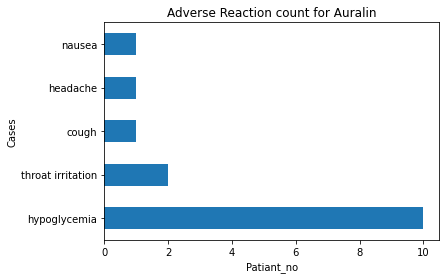

In [58]:
reactions.auralin.plot(kind='barh')
plt.title('Adverse Reaction count for Auralin')
plt.xlabel('Patiant_no')
plt.ylabel('Cases');

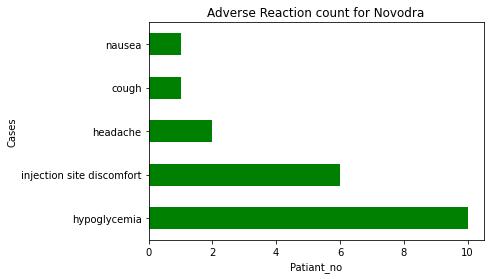

In [59]:
reactions.novodra.plot(kind='barh',color = 'g')
plt.title('Adverse Reaction count for Novodra')
plt.xlabel('Patiant_no')
plt.ylabel('Cases');

In [60]:
treatments_clean['dose_change'] = (treatments_clean['dose_start'] - treatments_clean['dose_end'])

In [61]:
dose = treatments_clean.groupby('treatment').dose_change.mean()
dose

treatment
auralin   -8.325714
novodra    0.385057
Name: dose_change, dtype: float64

Text(0, 0.5, 'Unit dose')

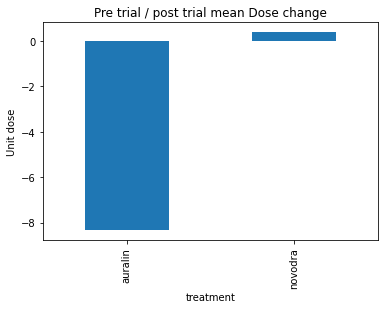

In [62]:
dose.plot(kind = 'bar')
plt.title('Pre trial / post trial mean Dose change')
plt.ylabel('Unit dose')

In [63]:
HbA1c_change = treatments_clean.groupby('treatment').hba1c_change.mean()
HbA1c_change

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64

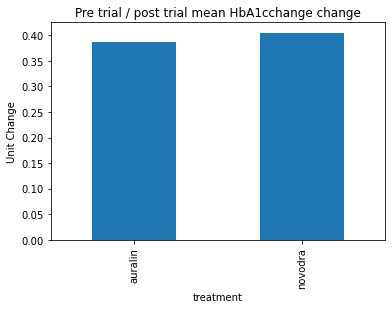

In [64]:
HbA1c_change.plot(kind = 'bar')
plt.title('Pre trial / post trial mean HbA1cchange change')
plt.ylabel('Unit Change');

# Conculsion

### Oral insulin (Novodra) is similary effective to injectable insulin (Auralin) according to this clinical trial 

### this means our oral insulin passed phase II clinical trials

### Now we have a good chance of making it past phase III as well as the regulatory reviews process and having a good chance of making it to market